In [1030]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error , r2_score
import warnings
warnings.filterwarnings('ignore')

In [1031]:
df = pd.read_csv("Car details v3.csv")

In [1032]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [1033]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [1034]:
missing_columns = (df.isna().sum()/df.notna().sum())*100
round(missing_columns,2)

name             0.00
year             0.00
selling_price    0.00
km_driven        0.00
fuel             0.00
seller_type      0.00
transmission     0.00
owner            0.00
mileage          2.79
engine           2.79
max_power        2.72
torque           2.81
seats            2.79
dtype: float64

As the missing row%s are less than 5% we can remove those rows and still maintain the integrity of the data

In [1035]:
df.dropna(inplace=True , ignore_index=True)

In [1036]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   object 
 5   seller_type    7906 non-null   object 
 6   transmission   7906 non-null   object 
 7   owner          7906 non-null   object 
 8   mileage        7906 non-null   object 
 9   engine         7906 non-null   object 
 10  max_power      7906 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7906 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 803.1+ KB


## EDA and Insights

To determine the top 10 most frequently used car brands in the datset

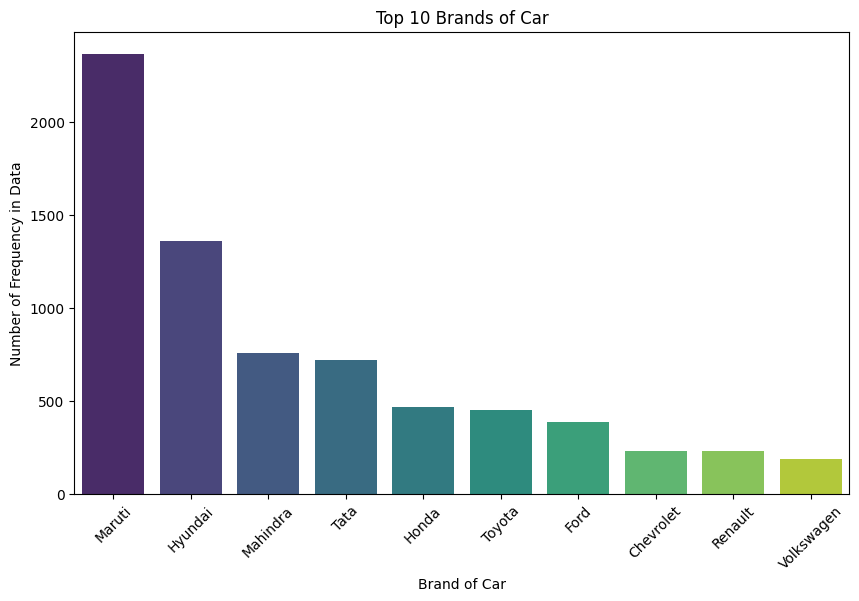

In [1037]:
df['name'] = df['name'].str.split().str[0]

brand_counts = df['name'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel("Brand of Car")
plt.ylabel("Number of Frequency in Data")
plt.title("Top 10 Brands of Car")
plt.show()

To determine the total selling price of cars which has changed over the years

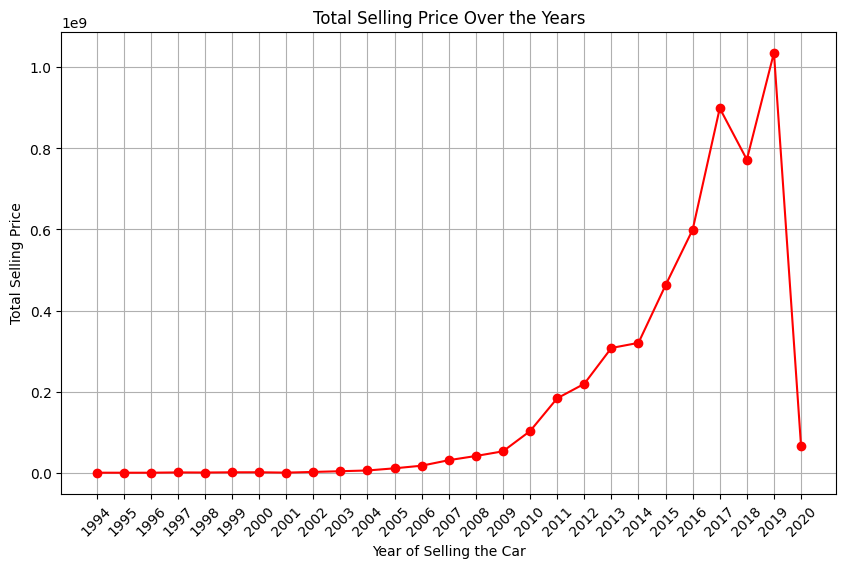

In [1038]:
sum_price_years = df.groupby('year')['selling_price'].sum()

plt.figure(figsize=(10, 6))
plt.plot(sum_price_years.index.values, sum_price_years.values, marker='o', linestyle='-', color='red')
plt.xlabel("Year of Selling the Car")
plt.ylabel("Total Selling Price")
plt.title("Total Selling Price Over the Years")
plt.grid(True)
plt.xticks(sum_price_years.index.values.astype(int), rotation=45)
plt.show()

To understand how fuel type affects the car sales

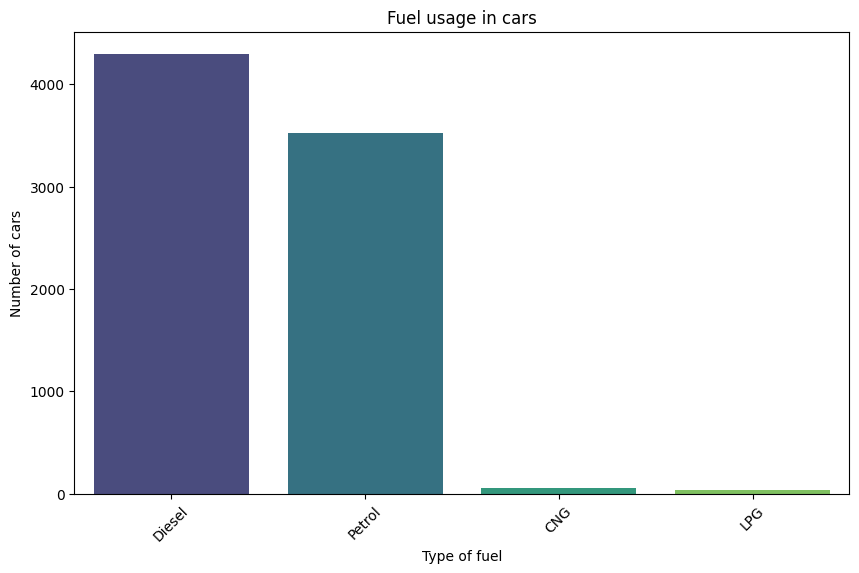

In [1039]:
fuel_type_count = df['fuel'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=fuel_type_count.index, y=fuel_type_count.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel("Type of fuel")
plt.ylabel("Number of cars")
plt.title("Fuel usage in cars")
plt.show()

To understand the distribution of transmission types in the cards and how transmission type affects average selling price

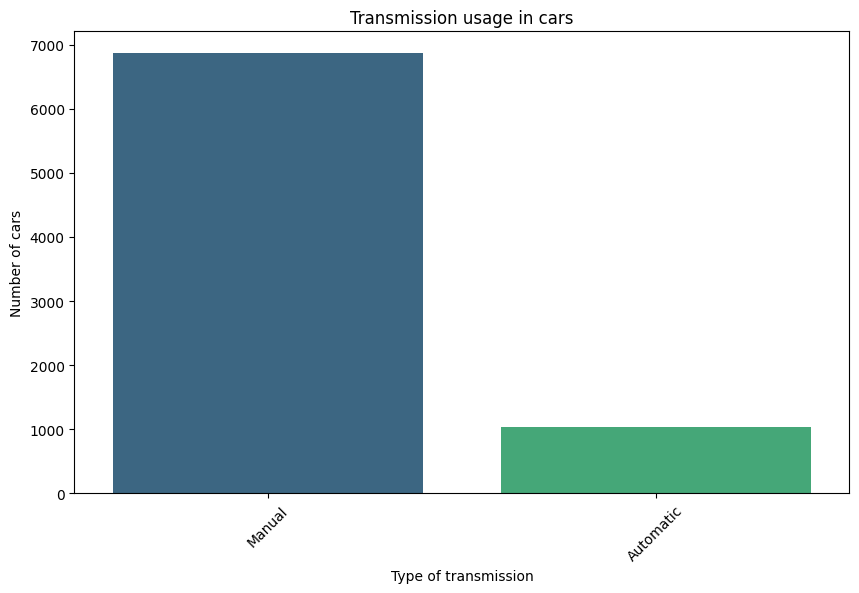

In [1040]:
transmission_values_count = df['transmission'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=transmission_values_count.index, y=transmission_values_count.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel("Type of transmission")
plt.ylabel("Number of cars")
plt.title("Transmission usage in cars")
plt.show()


To determine how transmission type affects selling price

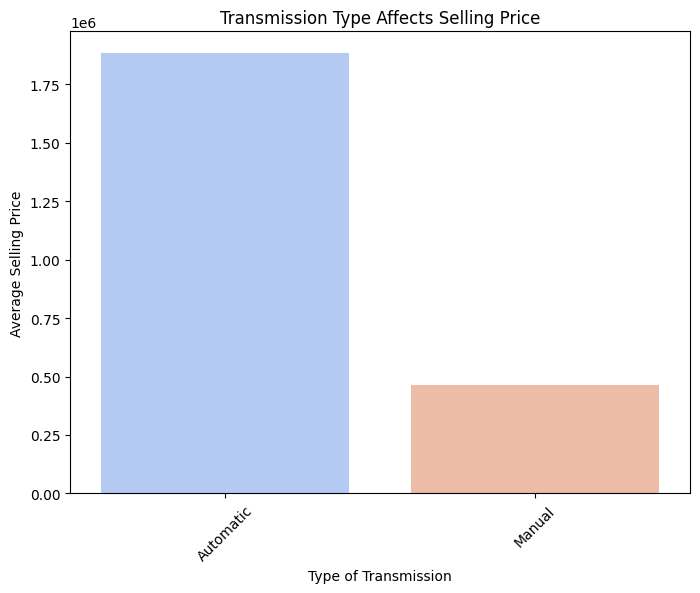

In [1041]:
selling_price_transmission = df.groupby('transmission')['selling_price'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=selling_price_transmission.index, y=selling_price_transmission.values, palette='coolwarm')
plt.xlabel("Type of Transmission")
plt.ylabel("Average Selling Price")
plt.title("Transmission Type Affects Selling Price")
plt.xticks(rotation=45)
plt.show()

To determine how the type of seller affect the average selling price of cars

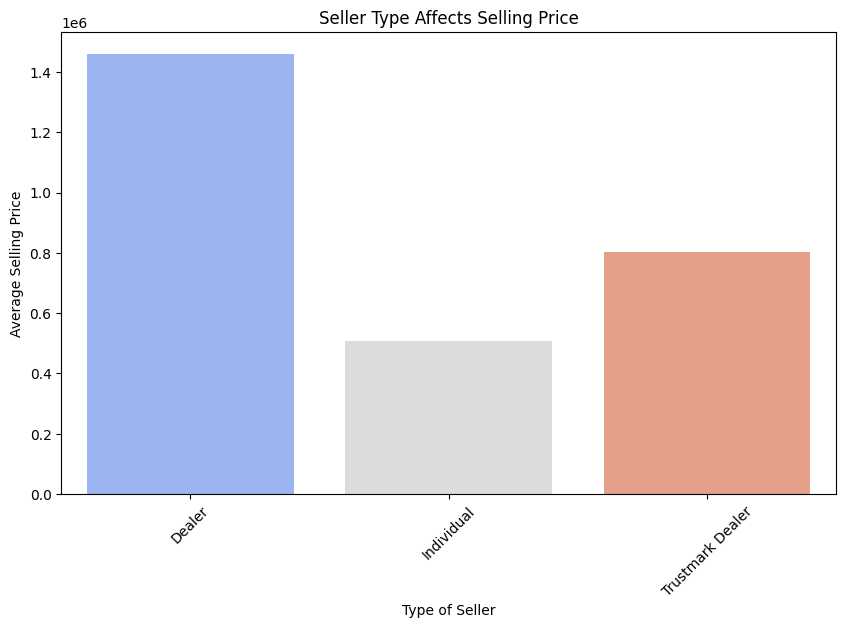

In [1042]:
selling_price_seller_types = df.groupby('seller_type')['selling_price'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=selling_price_seller_types.index, y=selling_price_seller_types.values, palette='coolwarm')
plt.xlabel("Type of Seller")
plt.ylabel("Average Selling Price")
plt.title("Seller Type Affects Selling Price")
plt.xticks(rotation=45)
plt.show()

To determine how the number of previous owners affect the average selling price of cars

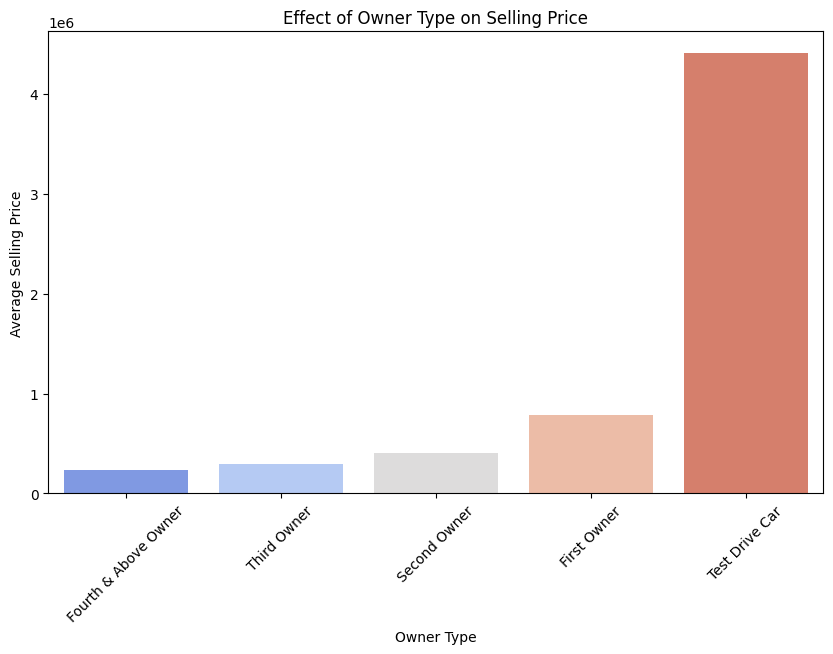

In [1043]:
owner_price = df.groupby('owner')['selling_price'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=owner_price.index, y=owner_price.values, palette='coolwarm')

plt.xlabel("Owner Type")
plt.ylabel("Average Selling Price")
plt.title("Effect of Owner Type on Selling Price")
plt.xticks(rotation=45)

plt.show()

## Data Preprocessing

In [1044]:
cols_to_clean = df[['mileage','engine','max_power']]
cols_to_clean

,mileage,engine,max_power
0,23.4 kmpl,1248 CC,74 bhp
1,21.14 kmpl,1498 CC,103.52 bhp
2,17.7 kmpl,1497 CC,78 bhp
3,23.0 kmpl,1396 CC,90 bhp
4,16.1 kmpl,1298 CC,88.2 bhp
...,...,...,...
7901,18.5 kmpl,1197 CC,82.85 bhp
7902,16.8 kmpl,1493 CC,110 bhp
7903,19.3 kmpl,1248 CC,73.9 bhp
7904,23.57 kmpl,1396 CC,70 bhp


Since these columns have both numeric and alphabetical objects, we can convert this columns to numeric to make them as a numeric feature

In [1045]:
for col in cols_to_clean:
    df[col] = df[col].astype(str).str.split().str[0]
    df[col] = pd.to_numeric(df[col])

In [1046]:
df['torque'].value_counts().head(50)

torque
190Nm@ 2000rpm               530
200Nm@ 1750rpm               445
90Nm@ 3500rpm                405
113Nm@ 4200rpm               223
114Nm@ 4000rpm               171
62Nm@ 3000rpm                164
69Nm@ 3500rpm                141
160Nm@ 2000rpm               138
330Nm@ 1600-2800rpm          122
74.5Nm@ 4000rpm              121
59Nm@ 2500rpm                112
110Nm@ 4800rpm               112
219.7Nm@ 1500-2750rpm        101
195Nm@ 1400-2200rpm          101
114.7Nm@ 4000rpm              97
400Nm@ 1750-2500rpm           96
20.4@ 1400-3400(kgm@ rpm)     82
72Nm@ 4386rpm                 78
290Nm@ 1800-2800rpm           76
259.9Nm@ 1900-2750rpm         75
114Nm@ 3500rpm                75
140Nm@ 1800-3000rpm           73
250Nm@ 1500-2500rpm           73
113.75nm@ 4000rpm             72
115Nm@ 4000rpm                72
205Nm@ 1750-3250rpm           68
320Nm@ 1700-2700rpm           66
259.8Nm@ 1900-2750rpm         65
430Nm@ 1750-2500rpm           64
240Nm@ 1600-2800rpm           62
145

Considering there is no specific distinction between the values and all entries are almost unique, we can safely ignore this column

In [1047]:
df.drop('torque' , axis = 1 , inplace = True)

Changing the column year (year of the car when it was bought) to Age so as to get a better useable feature

In [1048]:
# df.rename(columns={'year':'age'}, inplace=True)
df['car_age'] = 2025 - df['year']
df.drop('year', axis = 1 , inplace = True)
df.head(50)

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_age
0,Maruti,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0,11
1,Skoda,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,11
2,Honda,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0,19
3,Hyundai,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0,15
4,Maruti,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0,18
5,Hyundai,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5.0,8
6,Maruti,96000,175000,LPG,Individual,Manual,First Owner,17.30,1061,57.50,5.0,18
7,Maruti,45000,5000,Petrol,Individual,Manual,Second Owner,16.10,796,37.00,4.0,24
8,Toyota,350000,90000,Diesel,Individual,Manual,First Owner,23.59,1364,67.10,5.0,14
9,Ford,200000,169000,Diesel,Individual,Manual,First Owner,20.00,1399,68.10,5.0,12


### Since we have the final list of numerical columns, we will check for outliers on them

In [1049]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols

['selling_price',
 'km_driven',
 'mileage',
 'engine',
 'max_power',
 'seats',
 'car_age']

In [1050]:
outliers_dict = {}

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    outliers_dict[col] = outliers.index.tolist()
    
    # print(f"{col}: {len(outliers)} outliers")

print("\nSummary of columns with outliers:")
for col, indexes in outliers_dict.items():
    if len(indexes) > 0:
        print(f"{col}: {len(indexes)} outliers")



Summary of columns with outliers:
selling_price: 598 outliers
km_driven: 194 outliers
mileage: 24 outliers
engine: 1183 outliers
max_power: 564 outliers
seats: 1652 outliers
car_age: 165 outliers


In [1051]:
all_outlier_indices = set()
for indexes in outliers_dict.values():
    all_outlier_indices.update(indexes)

all_outlier_indices = sorted(all_outlier_indices)

outlier_rows = df.loc[all_outlier_indices]
print(f"\nTotal rows with at least one outlier: {len(outlier_rows)}")
display(outlier_rows)


Total rows with at least one outlier: 2347


,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_age
7,Maruti,45000,5000,Petrol,Individual,Manual,Second Owner,16.10,796,37.0,4.0,24
15,Maruti,778000,70000,Diesel,Individual,Manual,Second Owner,24.52,1248,88.5,7.0,9
17,Maruti,150000,80000,Petrol,Individual,Manual,Second Owner,19.70,796,46.3,5.0,23
26,Chevrolet,300000,70000,Diesel,Individual,Manual,First Owner,18.20,1248,73.8,7.0,12
28,Maruti,254999,25000,Petrol,Individual,Manual,First Owner,16.80,796,34.2,8.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...
7883,Honda,135000,120000,Petrol,Individual,Manual,Second Owner,13.00,1343,90.0,5.0,21
7886,Kia,1575000,20000,Diesel,Individual,Automatic,First Owner,17.80,1493,113.4,5.0,6
7891,Toyota,425000,129000,Diesel,Individual,Manual,First Owner,12.80,2494,102.0,8.0,15
7893,Maruti,40000,120000,Petrol,Individual,Manual,First Owner,16.10,796,37.0,4.0,28


### Removing outliers can be a bad idea because:
From the data as it seems, outliers may actually represent valid, important data — e.g., a luxury car with a high price, large engine, and more power.

The categorical columns needs to be encoded for the ML algorithms to be implemented

In [1052]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['name', 'fuel', 'seller_type', 'transmission', 'owner']

In [1053]:
categories_dict = {}

for col in categorical_cols:
    categories_dict[col] = df[col].nunique()

for col, count in categories_dict.items():
    print(f"{col}: {count} unique categories") 

name: 31 unique categories
fuel: 4 unique categories
seller_type: 3 unique categories
transmission: 2 unique categories
owner: 5 unique categories


In [1054]:
for col in categorical_cols:
    if (col!='name'):
        print(col, df[col].unique())

fuel ['Diesel' 'Petrol' 'LPG' 'CNG']
seller_type ['Individual' 'Dealer' 'Trustmark Dealer']
transmission ['Manual' 'Automatic']
owner ['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


### Encoding breakdown
1. The 'name' column contains multiple unique car brands/models (high cardinality) which makes it suitable for frequency based encoding 
    (OHE will lead to multiple columns)
    (target based encoding using selling price group by will lead to leakage in data)
2. 'fuel', 'seller' and 'transmission' columns contain less number of unique categories (**low cardinality**) and no inherent order (**nominal**) which is suitable for OHE as it would not lead to multiple number of columns
3. 'owner' column has a natural order present test drive, first, second etc. **ORDINAL Encoding** is the preferred choice of encoding in this case

In [1055]:
df['car_name_encoded'] = df['name'].map(df['name'].value_counts())
df.drop(columns='name', axis=1, inplace=True)
df['car_name_encoded'].nunique()

27

In [1056]:
df

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_age,car_name_encoded
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0,11,2367
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,11,104
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0,19,466
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0,15,1360
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0,18,2367
...,...,...,...,...,...,...,...,...,...,...,...,...
7901,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5.0,12,1360
7902,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5.0,18,1360
7903,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248,73.90,5.0,16,2367
7904,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396,70.00,5.0,12,719


**Use drop_first=True if:**
1. You're using linear models (e.g., Linear Regression, Logistic Regression).
2. You want to avoid multicollinearity (i.e., where one column is linearly dependent on others).
3. You’re okay interpreting results in terms of comparison to a base/reference category.

In [1057]:
encoded_df = pd.get_dummies(df[['fuel', 'seller_type', 'transmission']], drop_first='True', dtype='int64')
df = pd.concat([df.drop(columns=['fuel', 'seller_type', 'transmission']), encoded_df], axis=1)
df


,selling_price,km_driven,owner,mileage,engine,max_power,seats,car_age,car_name_encoded,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,450000,145500,First Owner,23.40,1248,74.00,5.0,11,2367,1,0,0,1,0,1
1,370000,120000,Second Owner,21.14,1498,103.52,5.0,11,104,1,0,0,1,0,1
2,158000,140000,Third Owner,17.70,1497,78.00,5.0,19,466,0,0,1,1,0,1
3,225000,127000,First Owner,23.00,1396,90.00,5.0,15,1360,1,0,0,1,0,1
4,130000,120000,First Owner,16.10,1298,88.20,5.0,18,2367,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,320000,110000,First Owner,18.50,1197,82.85,5.0,12,1360,0,0,1,1,0,1
7902,135000,119000,Fourth & Above Owner,16.80,1493,110.00,5.0,18,1360,1,0,0,1,0,1
7903,382000,120000,First Owner,19.30,1248,73.90,5.0,16,2367,1,0,0,1,0,1
7904,290000,25000,First Owner,23.57,1396,70.00,5.0,12,719,1,0,0,1,0,1


In [1058]:
owner_mapping = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 0
}
df['owner_encoded'] = df['owner'].map(owner_mapping)
df.drop(columns='owner', axis=1, inplace=True)


In [1059]:
df.head(50)

,selling_price,km_driven,mileage,engine,max_power,seats,car_age,car_name_encoded,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_encoded
0,450000,145500,23.40,1248,74.00,5.0,11,2367,1,0,0,1,0,1,1
1,370000,120000,21.14,1498,103.52,5.0,11,104,1,0,0,1,0,1,2
2,158000,140000,17.70,1497,78.00,5.0,19,466,0,0,1,1,0,1,3
3,225000,127000,23.00,1396,90.00,5.0,15,1360,1,0,0,1,0,1,1
4,130000,120000,16.10,1298,88.20,5.0,18,2367,0,0,1,1,0,1,1
5,440000,45000,20.14,1197,81.86,5.0,8,1360,0,0,1,1,0,1,1
6,96000,175000,17.30,1061,57.50,5.0,18,2367,0,1,0,1,0,1,1
7,45000,5000,16.10,796,37.00,4.0,24,2367,0,0,1,1,0,1,2
8,350000,90000,23.59,1364,67.10,5.0,14,452,1,0,0,1,0,1,1
9,200000,169000,20.00,1399,68.10,5.0,12,388,1,0,0,1,0,1,1


Scaling the values

In [1060]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])

df.head(20)

,selling_price,km_driven,mileage,engine,max_power,seats,car_age,car_name_encoded,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_encoded
0,-0.245613,1.343777,0.986157,-0.418188,-0.492024,-0.434128,-0.004158,1.375763,0.915987,-0.066684,-0.895854,0.452363,-0.175412,0.389408,-0.628935
1,-0.343950,0.894744,0.426198,0.077980,0.333827,-0.434128,-0.004158,-1.241411,0.915987,-0.066684,-0.895854,0.452363,-0.175412,0.389408,0.787288
2,-0.604542,1.246926,-0.426129,0.075995,-0.380120,-0.434128,2.066530,-0.822756,-1.091718,-0.066684,1.116254,0.452363,-0.175412,0.389408,2.203511
3,-0.522185,1.018008,0.887050,-0.124457,-0.044408,-0.434128,1.031186,0.211161,0.915987,-0.066684,-0.895854,0.452363,-0.175412,0.389408,-0.628935
4,-0.638960,0.894744,-0.822561,-0.318955,-0.094765,-0.434128,1.807694,1.375763,-1.091718,-0.066684,1.116254,0.452363,-0.175412,0.389408,-0.628935
5,-0.257905,-0.425941,0.178429,-0.519407,-0.272133,-0.434128,-0.780666,0.211161,-1.091718,-0.066684,1.116254,0.452363,-0.175412,0.389408,-0.628935
6,-0.680753,1.863246,-0.525237,-0.789322,-0.953628,-0.434128,1.807694,1.375763,-1.091718,14.996190,-0.895854,0.452363,-0.175412,0.389408,-0.628935
7,-0.743442,-1.130307,-0.822561,-1.315261,-1.527135,-1.476720,3.360709,1.375763,-1.091718,-0.066684,1.116254,0.452363,-0.175412,0.389408,0.787288
8,-0.368534,0.366470,1.033234,-0.187966,-0.685058,-0.434128,0.772350,-0.838947,0.915987,-0.066684,-0.895854,0.452363,-0.175412,0.389408,-0.628935
9,-0.552915,1.757591,0.143741,-0.118503,-0.657082,-0.434128,0.254678,-0.912963,0.915987,-0.066684,-0.895854,0.452363,-0.175412,0.389408,-0.628935


In [1061]:
X = df.drop('selling_price', axis=1)
Y = df['selling_price']

In [1062]:
X_train , X_test , y_train , y_test = train_test_split(X , Y , test_size = 0.25 , random_state = 44)

In [1063]:
print(f'Shape of X_Train {X_train.shape}')
print(f'Shape of X_Test {X_test.shape}')
print(f'Shape of Y_Train {y_train.shape}')
print(f'Shape of Y_Test {y_test.shape}')

Shape of X_Train (5929, 14)
Shape of X_Test (1977, 14)
Shape of Y_Train (5929,)
Shape of Y_Test (1977,)


## Modelling

In [1064]:
df_results = pd.DataFrame(columns=["Model", "Testing Accuracy (%)"])

In [1065]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print("Training Accuracy:", lr.score(X_train, y_train) * 100)
lin_reg_acc = lr.score(X_test, y_test) * 100
print("Testing Accuracy:", lin_reg_acc)
print("R² Score:", r2_score(y_test, lr.predict(X_test)) * 100)
print("Mean Squared Error:", mean_squared_error(y_test, lr.predict(X_test)))

Training Accuracy: 67.71397238497909
Testing Accuracy: 69.09500121227038
R² Score: 69.09500121227038
Mean Squared Error: 0.2612175583615297


In [1066]:
ridge = Ridge(alpha=1000)
ridge.fit(X_train, y_train)

print("Training Accuracy:", ridge.score(X_train, y_train) * 100)
ridge_reg_acc = ridge.score(X_test, y_test) * 100
print("Testing Accuracy:", ridge_reg_acc)
print("R² Score:", r2_score(y_test, ridge.predict(X_test)) * 100)
print("Mean Squared Error:", mean_squared_error(y_test, ridge.predict(X_test)))

Training Accuracy: 66.80362972685046
Testing Accuracy: 69.82255545379381
R² Score: 69.82255545379381
Mean Squared Error: 0.25506806960562717


In [1067]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

print("Training Accuracy:", lasso.score(X_train, y_train) * 100)
lasso_reg_acc = lasso.score(X_test, y_test) * 100
print("Testing Accuracy:", lasso_reg_acc)
print("R² Score:", r2_score(y_test, lasso.predict(X_test)) * 100)
print("Mean Squared Error:", mean_squared_error(y_test, lasso.predict(X_test)))

Training Accuracy: 64.28919780560007
Testing Accuracy: 66.69831962277186
R² Score: 66.69831962277186
Mean Squared Error: 0.2814749709982


In [1068]:
df_results.loc[len(df_results)] = ["Linear Regression", lin_reg_acc]
df_results.loc[len(df_results)] = ["Ridge Regression", ridge_reg_acc]
df_results.loc[len(df_results)] = ["Lasso Regression", lasso_reg_acc]

In [1069]:
print(df_results)

               Model  Testing Accuracy (%)
0  Linear Regression             69.095001
1   Ridge Regression             69.822555
2   Lasso Regression             66.698320


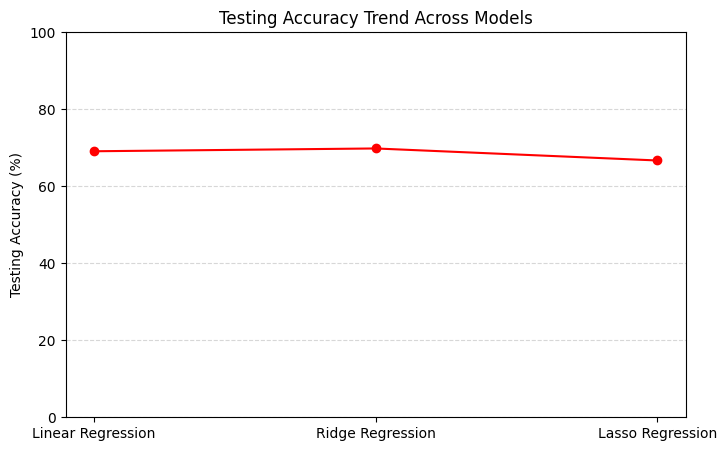

In [1070]:
plt.figure(figsize=(8, 5))
plt.plot(df_results["Model"].values, df_results["Testing Accuracy (%)"].values, marker='o', linestyle='-', color='red')
plt.title("Testing Accuracy Trend Across Models")
plt.ylabel("Testing Accuracy (%)")
plt.ylim(0, 100)
plt.grid(axis='y', linestyle="--", alpha=0.5)
plt.show()